## What is an API?

API stands for *Application Programming Interface*. In the broadest sense of the
definition, an API is any pattern of programming that allows a programmer to
solve a task. 
You already know some APIs!
- The pandas API
- The matplotlib API

### What is a Web API?
- A web API uses (usually) HTTP to retrieve or manipulate data from the web.
- HTTP = HyperText Transfer Protocol 

## What is HTTP?


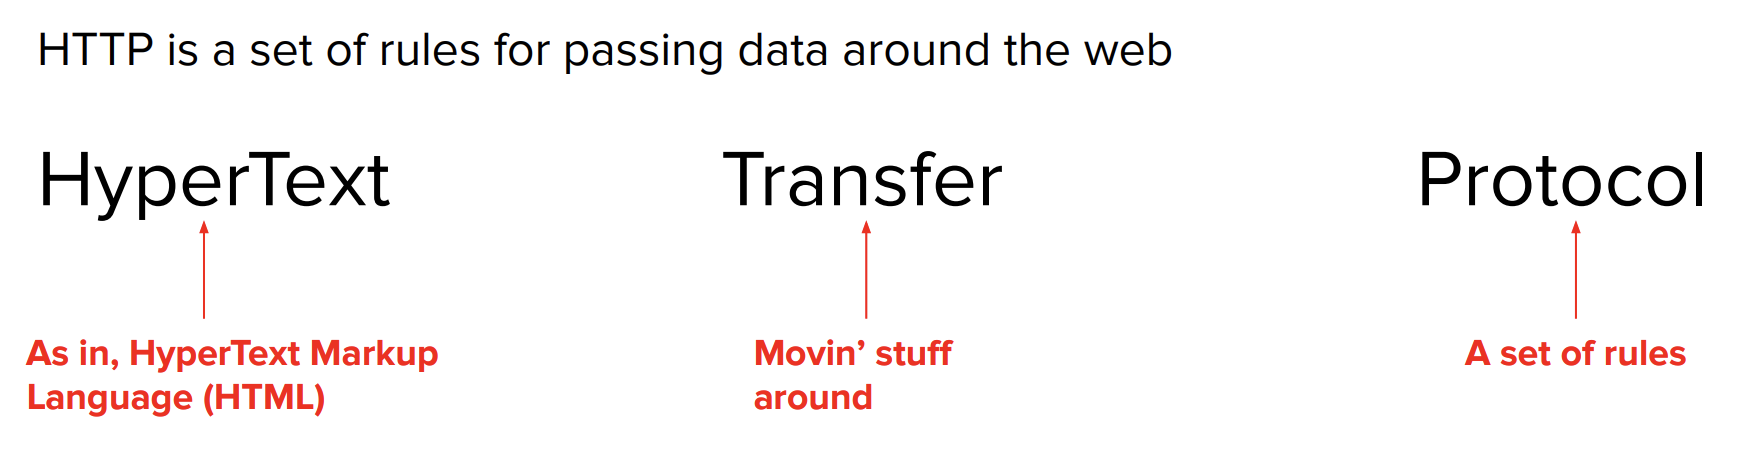

### HTTP Requests
- HTTP commands are in the form of requests. 
- There are several types of requests. Since we are data professionals, we’ll mostly only need the GET request because we want to GET data.

### Example:

Let’s check out this website:
(https://www.example.com/)

And press Ctrl-Shift-I (Cmd-Shift-I for Mac)

- Now, let’s open up our GitBash/Command Line and carry out our first HTTP request!
- `curl www.example.com`

### Why Did We Get This?
- Everytime we access a webpage, this is essentially we're doing: 

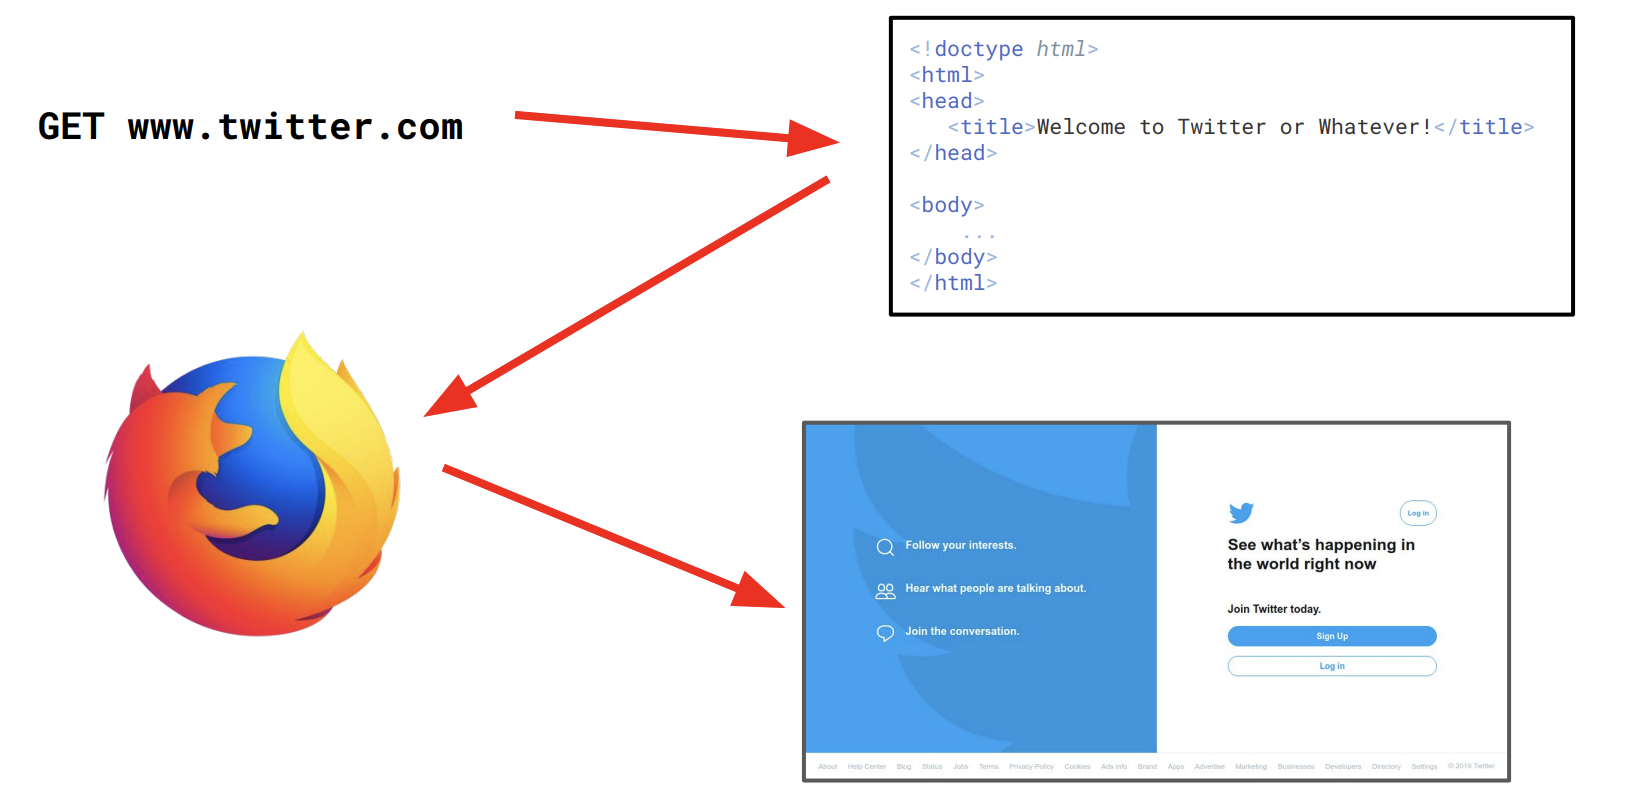

### Now let's try this with a real API:

- We’ll use the PokeAPI: https://pokeapi.co/
- run `curl https://pokeapi.co/api/v2/pokemon/bulbasaur` in Gitbash/Terminal
- We get JSON back! And JSON (JavaScript Object Notation) looks a lot like a Python dictionary... which we know how to work with! 


## The `requests` Library
- The `requests` library is a library for submitting HTTP requests from Python. Everyone should already have the `requests` library installed, but if you have not installed it, you need to: `pip install requests`
- A web API is meant to be scrapped, so many websites or companies will set up these platforms that allow them to serve up this information when we request it. This allows us to get data from a site in a very structured way.


In [111]:
import pandas as pd
import numpy as np
import requests
import time

In [112]:
# Create url variable for API call.

base_url = 'https://pokeapi.co/api/v2/'

#we use this base url to specifiy what type of data we are asking for
#after we have our base url defined, we can drill down into what specific info we want.
#we can add the name of a specific pokemon

In [113]:
# Submit request
res = requests.get(base_url + 'pokemon/pikachu')

In [114]:
# Request response code
res.status_code

200

In [115]:
# Text of request
res.text

'{"abilities":[{"ability":{"name":"static","url":"https://pokeapi.co/api/v2/ability/9/"},"is_hidden":false,"slot":1},{"ability":{"name":"lightning-rod","url":"https://pokeapi.co/api/v2/ability/31/"},"is_hidden":true,"slot":3}],"base_experience":112,"forms":[{"name":"pikachu","url":"https://pokeapi.co/api/v2/pokemon-form/25/"}],"game_indices":[{"game_index":84,"version":{"name":"red","url":"https://pokeapi.co/api/v2/version/1/"}},{"game_index":84,"version":{"name":"blue","url":"https://pokeapi.co/api/v2/version/2/"}},{"game_index":84,"version":{"name":"yellow","url":"https://pokeapi.co/api/v2/version/3/"}},{"game_index":25,"version":{"name":"gold","url":"https://pokeapi.co/api/v2/version/4/"}},{"game_index":25,"version":{"name":"silver","url":"https://pokeapi.co/api/v2/version/5/"}},{"game_index":25,"version":{"name":"crystal","url":"https://pokeapi.co/api/v2/version/6/"}},{"game_index":25,"version":{"name":"ruby","url":"https://pokeapi.co/api/v2/version/7/"}},{"game_index":25,"version"

In [116]:
# Bring in the JSON!
pika = res.json()

# Since we've converted the JSON -> dict, we know how to work with this!
pika.keys()

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])

In [117]:
# Height, Weight
print(pika['height'])
print(pika['weight'])

4
60


In [118]:
# What moves can Pikachu learn?
pika['moves']

[{'move': {'name': 'mega-punch', 'url': 'https://pokeapi.co/api/v2/move/5/'},
  'version_group_details': [{'level_learned_at': 0,
    'move_learn_method': {'name': 'machine',
     'url': 'https://pokeapi.co/api/v2/move-learn-method/4/'},
    'version_group': {'name': 'red-blue',
     'url': 'https://pokeapi.co/api/v2/version-group/1/'}},
   {'level_learned_at': 0,
    'move_learn_method': {'name': 'machine',
     'url': 'https://pokeapi.co/api/v2/move-learn-method/4/'},
    'version_group': {'name': 'yellow',
     'url': 'https://pokeapi.co/api/v2/version-group/2/'}},
   {'level_learned_at': 0,
    'move_learn_method': {'name': 'tutor',
     'url': 'https://pokeapi.co/api/v2/move-learn-method/3/'},
    'version_group': {'name': 'emerald',
     'url': 'https://pokeapi.co/api/v2/version-group/6/'}},
   {'level_learned_at': 0,
    'move_learn_method': {'name': 'tutor',
     'url': 'https://pokeapi.co/api/v2/move-learn-method/3/'},
    'version_group': {'name': 'firered-leafgreen',
     'u

In [119]:
def get_move(move):
    return move['move']['name']

In [120]:
pika_moves = [get_move(move) for move in pika['moves']]

In [121]:
pika_moves[:10]

['mega-punch',
 'pay-day',
 'thunder-punch',
 'slam',
 'double-kick',
 'mega-kick',
 'headbutt',
 'body-slam',
 'take-down',
 'double-edge']

## Creating a `pandas` DataFrame from JSON
---
To create a DataFrame, we simply need a list of dictionaries. Let's try creating a DataFrame from Pikachu's abilities.

In [122]:
pika_df = pd.DataFrame(pika['abilities'])
pika_df

,ability,is_hidden,slot
0,"{'name': 'static', 'url': 'https://pokeapi.co/...",False,1
1,"{'name': 'lightning-rod', 'url': 'https://poke...",True,3


But notice each `ability` is a dictionary. In the cell below, let's extract the `name` from each ability and set it as its own column.

In [123]:
pika_df['ability'][0]

{'name': 'static', 'url': 'https://pokeapi.co/api/v2/ability/9/'}

In [124]:
def extract(ability_dict):
    return ability_dict['name']
    
pika_df['name'] = pika_df['ability'].map(extract)    
    

In [125]:
pika_df.head()

,ability,is_hidden,slot,name
0,"{'name': 'static', 'url': 'https://pokeapi.co/...",False,1,static
1,"{'name': 'lightning-rod', 'url': 'https://poke...",True,3,lightning-rod


In [127]:
pika_df['url'] = pika_df['ability'].map(lambda x: x['url'])

In [128]:
pika_df.head()

,ability,is_hidden,slot,name,url
0,"{'name': 'static', 'url': 'https://pokeapi.co/...",False,1,static,https://pokeapi.co/api/v2/ability/9/
1,"{'name': 'lightning-rod', 'url': 'https://poke...",True,3,lightning-rod,https://pokeapi.co/api/v2/ability/31/


### Reddit API

documentation: https://github.com/pushshift/api

In [142]:
base_url = 'https://api.pushshift.io/reddit/search/submission/'

## Parameters
---

If we want the post recent posts from /r/Science, we have to use the `subreddit` parameter. The URL would be as follows:

https://api.pushshift.io/reddit/search/submission/?subreddit=science

Parameters are everything after the `?` in a URL. They're sort of like a dictionary, in that each parameter is a key/value pair. (ie `subreddit=science`). 

Multiple parameters are separated with a `&`.

https://api.pushshift.io/reddit/search/submission/?subreddit=science&thing1=thing2


How would we search for the word "election" in [/r/news](https://reddit.com/r/news)? Your answer should be a URL with two parameters.

In [143]:
# NOTE: You already have base_url
base_url + '?subreddit=news&q=election'

'https://api.pushshift.io/reddit/search/submission/?subreddit=news&q=election'

In [150]:
# Get the most recent *50* posts from */r/news* containing the word *"election"*

params = {
    'subreddit': 'science',
    'q': 'rocket',
    'size': 50
}
res = requests.get(base_url, params=params)
data = res.json()
# data

In [151]:
# Convert the posts into a DataFrame
df = pd.DataFrame(data['data'])

In [152]:
df.head()

,all_awardings,allow_live_comments,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,total_awards_received,treatment_tags,updated_utc,upvote_ratio,url,url_overridden_by_dest,utc_datetime_str,view_count,whitelist_status,wls
0,[],False,False,justhejoejoe,None,None,[],None,None,None,...,0,[],1670812087,1.0,https://novalise.space/noz.html,https://novalise.space/noz.html,2022-12-12 02:27:49,None,all_ads,6
1,[],False,False,29PiecesOfSilver,None,None,[],None,None,None,...,0,[],1669820971,1.0,https://apnews.com/article/d2a9f8802a1286c17ec...,https://apnews.com/article/d2a9f8802a1286c17ec...,2022-11-16 19:32:51,None,all_ads,6
2,[],False,False,I-Love-The-Universe,None,None,[],None,None,None,...,0,[],1669821111,1.0,https://ilovetheuniverse.com/breaking-nasa-jus...,https://ilovetheuniverse.com/breaking-nasa-jus...,2022-11-16 09:44:39,None,all_ads,6
3,[],False,False,gankstar5,None,None,[],None,None,None,...,0,[],1669821139,1.0,https://www.bbc.co.uk/news/live/science-enviro...,https://www.bbc.co.uk/news/live/science-enviro...,2022-11-16 06:53:27,None,all_ads,6
4,[],False,False,ochesynigeria,None,None,[],None,None,None,...,0,[],1669822167,1.0,https://www.kenyasportsnews.com/2022/11/the-fi...,https://www.kenyasportsnews.com/2022/11/the-fi...,2022-11-13 07:11:35,None,all_ads,6
